Type: <class 'numpy.ndarray'>
dtype: int64
shape: (500, 500, 3)


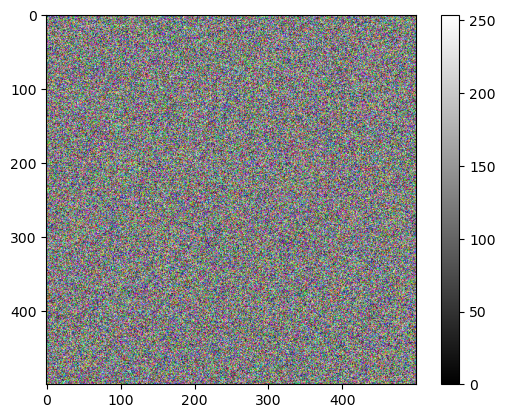

In [311]:
# Wygenerowanie pliku z losowym tłem (macierz 500x500x3)

import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.randint(0, 255, size=[500, 500, 3], dtype=int)

plt.imshow(random_image, cmap='gray')
plt.colorbar();

print('Type:', type(random_image))
print('dtype:', random_image.dtype)
print('shape:', random_image.shape)

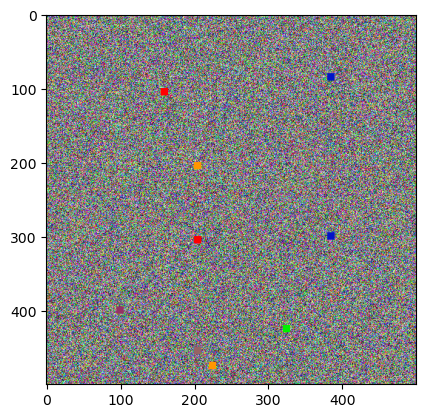

In [312]:
# Dodajemy kwadraciki 10x10 o określonych kolorach [R,G,B]

random_image[100:110, 155:165, :] = [255, 0, 0]
random_image[300:310, 200:210, :] = [255, 0, 0]
random_image[200:210, 200:210, :] = [255, 150, 0]
random_image[295:305, 380:390, :] = [0, 20, 200]
random_image[395:405, 95:105, :] = [150, 50, 100]
random_image[450:460, 200:210, :] = [150, 100, 100]
random_image[470:480, 220:230, :] = [255, 150, 0]
random_image[ 80: 90, 380:390, :] = [0, 20, 200]
random_image[420:430, 320:330, :] = [0, 240, 0]

plt.imshow(random_image);


In [313]:
import cv2

# Wczytanie obrazu

# Współrzędne kwadratów
kwadraty =[
    (155, 100),   # Kwadrat 1: (x=20, y=30), szerokość=50, wysokość=50
    (200, 300),  # Kwadrat 2: (x=100, y=80), szerokość=30, wysokość=30
    (200, 200), # Kwadrat 3: (x=200, y=150), szerokość=70, wysokość=40
    (380, 295),
    (95, 395),
    (200, 450),
    (220, 470),
    (380, 80),
    (320, 420)
]

def isInside(squareX, squareY, x, y):
    if ((squareX > x and squareX < x+10 and squareY > y and squareY < y+10) or
       (squareX+10 > x and squareX+10 < x+10 and squareY > y and squareY < y+10) or
       (squareX > x and squareX < x+10 and squareY+10 > y and squareY+10 < y+10) or
       (squareX+10 > x and squareX+10 < x+10 and squareY+10 > y and squareY+10 < y+10) or 
       (squareX==x and squareY+10 > y and squareY+10 < y+10) or
       (squareX==x and squareY > y and squareY < y+10) or 
       (squareY==y and squareX+10 > x and squareX+10 < x+10) or
       (squareY==y and squareX > x and squareX < x+10) or
       (squareX==x and squareY==y)):
        return True
    else:
        return False

labels=[]
coordiates=[]

# Iteracja po całym obrazie
wysokosc_obrazu=500
szerokosc_obrazu=500

for y in range(0, 500, 10):
    for x in range(0, 500, 10):
        isAnomaly=False
        for kwadrat in kwadraty:
            if isInside(kwadrat[0], kwadrat[1], x, y):
                isAnomaly=True
                cords=(x,y)
                coordiates.append(cords)
                break
        if isAnomaly:
            labels.append(1)
        else:
            labels.append(0)
                


In [314]:
imArray=np.asarray(im)
imArray=cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB)  

In [315]:
for x,y in coordiates:
    cv2.rectangle(imArray, (x, y), (x + 10, y + 10), (0, 255, 0), 2)  # Draw green rectangles

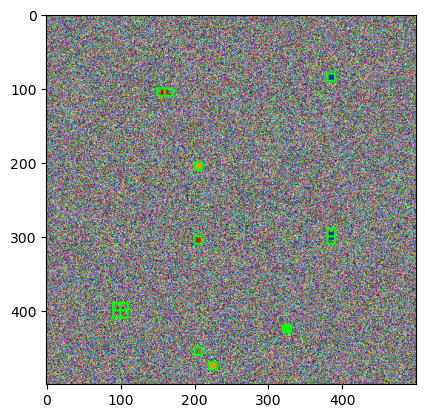

In [316]:
plt.figure()
plt.imshow(imArray)

In [317]:
len(labels)

2500

In [318]:
sum=0
for i in labels:
    if i==1:
        sum+=1
print(sum)

14


In [319]:
# Zapis obrazka do pliku

import matplotlib.image as mpimg


random_image = random_image.astype(np.uint8)
mpimg.imsave('images/im1.png', random_image)


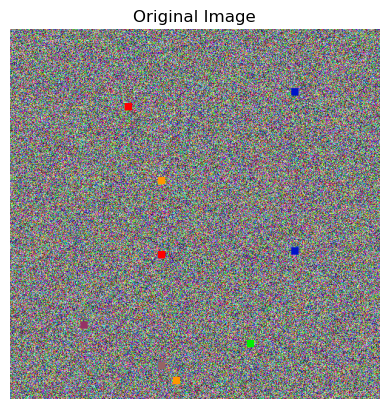

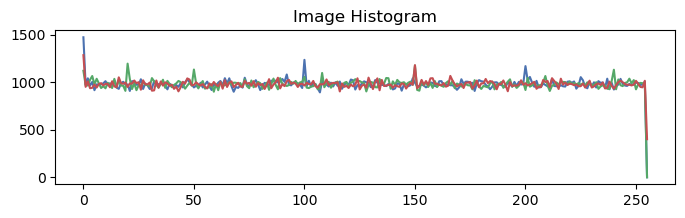

In [320]:
import cv2 
import matplotlib.pyplot as plt 


# load image 
imageObj = cv2.imread('images/im1.png') 
#When we read the image using cv2.imread() method, the image read is in BGR format


# to avoid grid lines 
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB)) 
plt.show() 

# Get BGR data from image 
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()


<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
(500, 500)


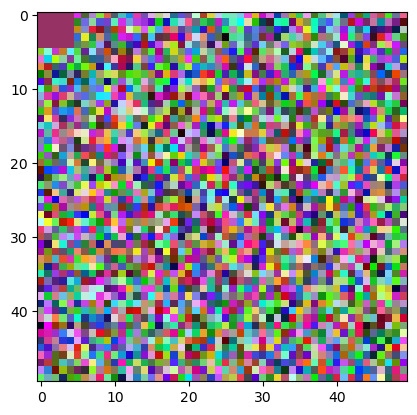

In [321]:
from PIL import Image

print(type(imageObj))
im = Image.fromarray(imageObj)
print(type(im))

print(type(im))
print(im.size)

# Wycięcie wycinka nr 2
im_crop = im.crop((100, 400, 150, 450))

im_crop = np.asarray(im_crop)

plt.figure()
plt.imshow(cv2.cvtColor(im_crop, cv2.COLOR_BGR2RGB))

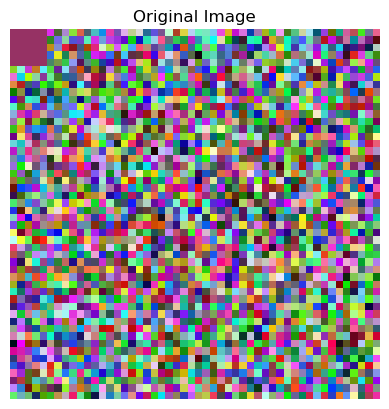

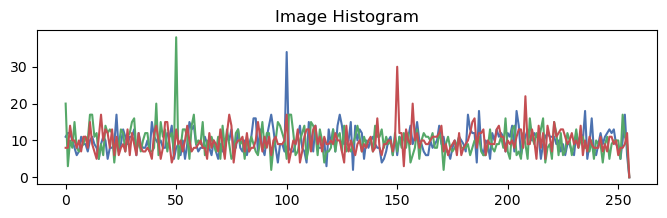

In [322]:

# to avoid grid lines 
im_crop=np.asarray(im_crop)
imRGB = cv2.cvtColor(im_crop, cv2.COLOR_BGR2RGB)  
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(imRGB) 
plt.show() 



# Get BGR data from image 
blue_color = cv2.calcHist([im_crop], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([im_crop], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([im_crop], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()

In [323]:
print(np.max(blue_color))
print(np.mean(blue_color))

34.0
9.765625


In [324]:
def hasAnomaly(img, threshold):
    img=np.asarray(img)
    bHist = cv2.calcHist([img], [0], None, [256], [0, 256]) 
    gHist = cv2.calcHist([img], [1], None, [256], [0, 256]) 
    rHist = cv2.calcHist([img], [2], None, [256], [0, 256]) 

    bMax=np.max(bHist)
    gMax=np.max(gHist)
    rMax=np.max(rHist)

    bMean=np.mean(bHist)
    gMean=np.mean(gHist)
    rMean=np.mean(rHist)

    if bMax>threshold*bMean or rMax>threshold*rMean or gMax>threshold*gMean:
        return True
    return False

In [325]:
im = Image.fromarray(imageObj)

listOfCoordinates=[]

for y in range(0, 500, 50):
    for x in range(0, 500, 50):
        croppedImg = im.crop((x, y, x+50, y+50))
        if hasAnomaly(croppedImg, 2.7):
            anomaliesCoordinates=(x,y)
            listOfCoordinates.append(anomaliesCoordinates)

In [326]:
print(listOfCoordinates)

[(350, 50), (150, 100), (200, 200), (350, 250), (200, 300), (350, 300), (50, 350), (100, 350), (50, 400), (100, 400), (300, 400), (200, 450)]


In [327]:
imArray=np.asarray(im)
imArray=cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB)  

In [328]:
for x,y in listOfCoordinates:
    cv2.rectangle(imArray, (x, y), (x + 50, y + 50), (0, 255, 0), 2)  # Draw green rectangles

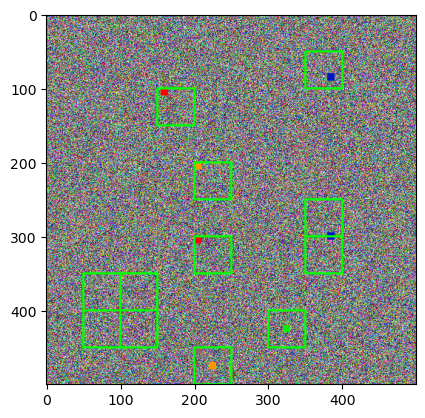

In [329]:
plt.figure()
plt.imshow(imArray)

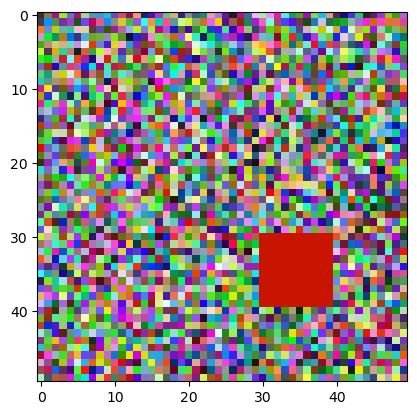

In [330]:
im = Image.fromarray(imageObj)
cropped=im.crop((350, 50, 400, 100))
plt.imshow(cropped)

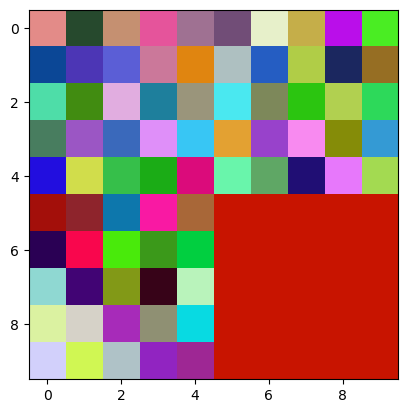

In [331]:

smallCrop=cropped.crop((25,25,35,35))
plt.imshow(smallCrop)

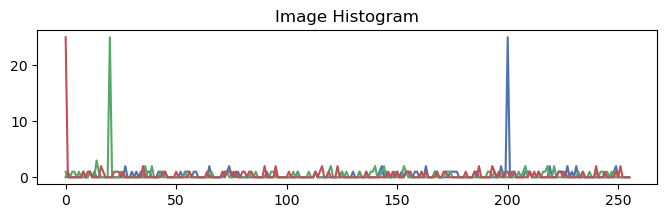

In [332]:
smallCrop=np.asarray(smallCrop)

# Get BGR data from image 
blue_color = cv2.calcHist([smallCrop], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([smallCrop], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([smallCrop], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()

In [347]:
def findColor(img):

    img=np.asarray(img)
    
    blue_color = cv2.calcHist([img], [0], None, [256], [0, 256]) 
    green_color = cv2.calcHist([img], [1], None, [256], [0, 256]) 
    red_color = cv2.calcHist([img], [2], None, [256], [0, 256]) 

    R=np.argmax(blue_color)
    G=np.argmax(green_color)
    B=np.argmax(red_color)
    return (R,G,B)

In [353]:
im = Image.fromarray(imageObj)
listOfCoordinatesSmall=[]


for xBigSquare, yBigSquare in listOfCoordinates:
    for y in range(0, 50, 10):
        for x in range(0, 50, 10):
            BigSquare=im.crop((xBigSquare,yBigSquare, xBigSquare+50 ,yBigSquare+50))
            croppedImg = BigSquare.crop((x, y, x+10, y+10))
            if hasAnomaly(croppedImg, 50):
                R, G, B = findColor(croppedImg)
                anomaliesCoordinates=(xBigSquare+x,yBigSquare+y,R,G,B)
                listOfCoordinatesSmall.append(anomaliesCoordinates)

In [354]:
listOfCoordinatesSmall

[(380, 80, 200, 20, 0),
 (150, 100, 0, 0, 255),
 (160, 100, 0, 0, 255),
 (200, 200, 0, 150, 255),
 (380, 290, 200, 20, 0),
 (200, 300, 0, 0, 255),
 (380, 300, 200, 20, 0),
 (90, 390, 100, 50, 150),
 (100, 390, 100, 50, 150),
 (90, 400, 100, 50, 150),
 (100, 400, 100, 50, 150),
 (320, 420, 0, 240, 0),
 (200, 450, 100, 100, 150),
 (220, 470, 0, 150, 255)]

In [355]:
imArray=np.asarray(im)
imArray=cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB)  

In [358]:
for x,y, _, _, _ in listOfCoordinatesSmall:
    cv2.rectangle(imArray, (x, y), (x + 10, y + 10), (0, 255, 0), 2)  # Draw green rectangles

In [359]:
print(listOfCoordinatesSmall)

[(380, 80, 200, 20, 0), (150, 100, 0, 0, 255), (160, 100, 0, 0, 255), (200, 200, 0, 150, 255), (380, 290, 200, 20, 0), (200, 300, 0, 0, 255), (380, 300, 200, 20, 0), (90, 390, 100, 50, 150), (100, 390, 100, 50, 150), (90, 400, 100, 50, 150), (100, 400, 100, 50, 150), (320, 420, 0, 240, 0), (200, 450, 100, 100, 150), (220, 470, 0, 150, 255)]


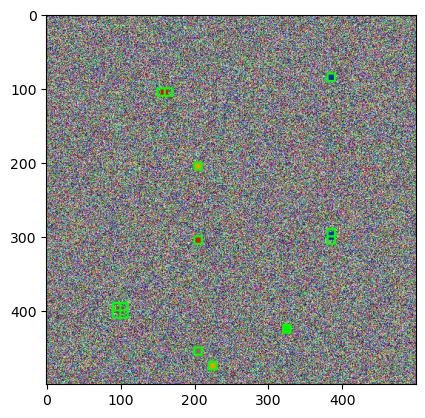

In [360]:
plt.figure()
plt.imshow(imArray)

In [365]:
result=[]

for y in range(0, 500, 10):
    for x in range(0, 500, 10):
        hasAnomaly=False
        for squareX , squareY,_, _, _ in listOfCoordinatesSmall:
            if x==squareX and y==squareY:
                hasAnomaly=True
        if hasAnomaly:
            result.append(1)
        else:
            result.append(0)

In [366]:
print(result==labels)

True


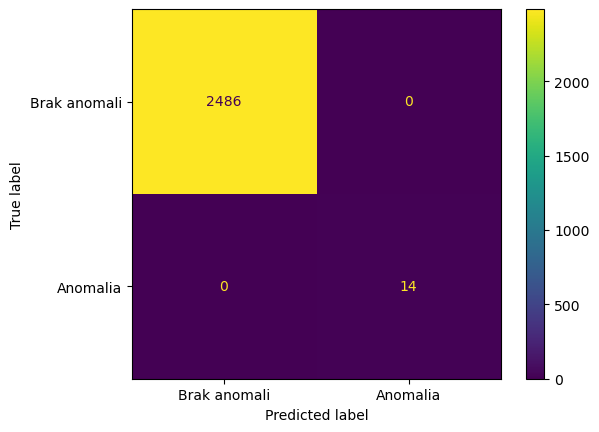

In [367]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

names=("Brak anomali", "Anomalia")

cm = confusion_matrix(labels, result, labels=(0,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
sns.reset_orig()
disp.plot()
plt.show()

In [368]:
from sklearn.metrics import f1_score

# Obliczanie F1 score
f1 = f1_score(labels, result)

print("F1 score:", f1)

F1 score: 1.0
